In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split #modelos
#capas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#error
from sklearn.metrics import mean_absolute_error, classification_report
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
#edit-edit2

In [ ]:
dataframe = pd.read_csv("Data_Train.csv", sep=";")

In [ ]:
dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10677,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10678,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10679,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dataframe["Price"] = dataframe["Price"]/77.9


Airline: LabelEncoder <br>
Date_of_Journey: Separar por meses y días <br>
Source: LabelEncoder <br>
Destination: LabelEncoder <br>
Route: drop <br>
Dep_time: Separar por horas <br>
Duration: separar por horas <br>
Total_stops: LabelEncoder <br>
Addtitional_infor: LabelEncoder <br>


# Análisis

In [ ]:
dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,50.025674
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,98.356868
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,178.202824
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,79.820282
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,170.757381
...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,52.721438
10677,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,53.209243
10678,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,92.798460
10679,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,162.362003


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Date_of_Journey  10681 non-null  object 
 2   Source           10681 non-null  object 
 3   Destination      10681 non-null  object 
 4   Route            10681 non-null  object 
 5   Dep_Time         10681 non-null  object 
 6   Arrival_Time     10681 non-null  object 
 7   Duration         10681 non-null  object 
 8   Total_Stops      10681 non-null  object 
 9   Additional_Info  10681 non-null  object 
 10  Price            10681 non-null  float64
dtypes: float64(1), object(10)
memory usage: 918.0+ KB


In [ ]:
dataframe.describe()

,Price
count,10681.000000
mean,116.642402
std,59.192238
min,22.580231
25%,67.740693
50%,107.471117
75%,158.831836
max,1020.693196


<AxesSubplot:title={'center':'Pearson'}>

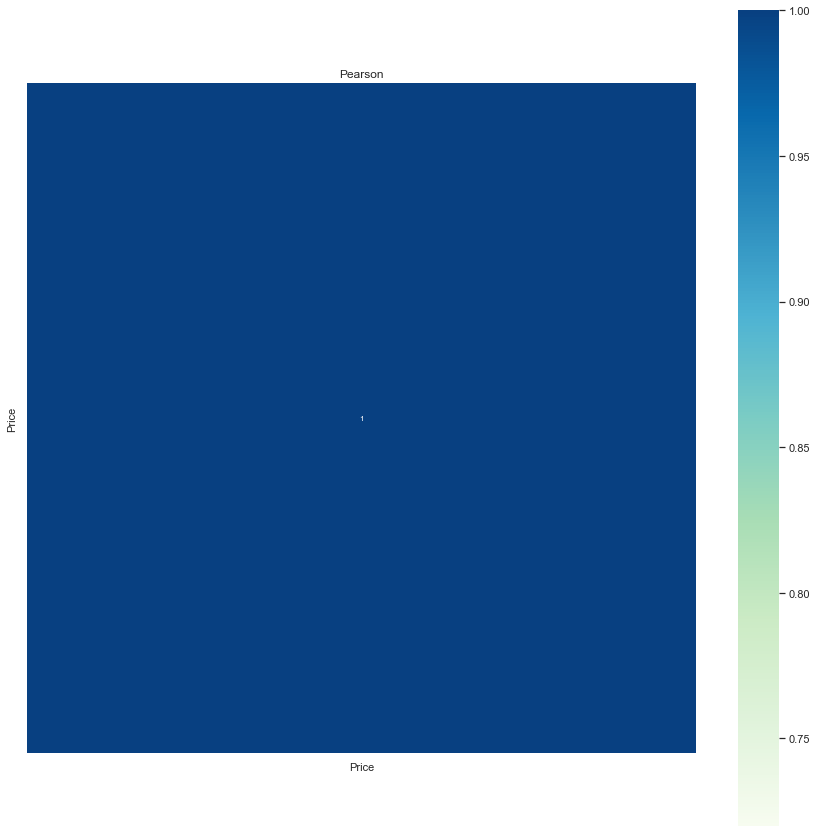

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

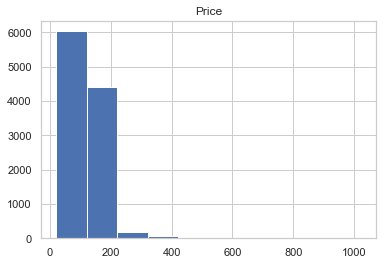

In [ ]:
dataframe.hist()

In [ ]:
dataframe['Date_of_Journey'] = pd.to_datetime(dataframe['Date_of_Journey'])
dataframe['month'] = dataframe['Date_of_Journey'].apply(lambda date:date.month)
dataframe['day_of_the_month'] = dataframe['Date_of_Journey'].apply(lambda date:date.day)
dataframe = dataframe.drop('Date_of_Journey',axis=1)


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/

In [ ]:
dataframe

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day_of_the_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,50.025674,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,98.356868,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,178.202824,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,79.820282,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,170.757381,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,52.721438,9,4
10677,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,53.209243,4,27
10678,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,92.798460,4,27
10679,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,162.362003,1,3


Aplicación de LabelEncoder

In [ ]:
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

In [ ]:
#Aerolínea
lbe = LabelEncoder()
modelAirlineModificado = lbe.fit_transform(dataframe.Airline)
dataframe.Airline = modelAirlineModificado
#Para revertir
get_integer_mapping(lbe);
integerMapping = get_integer_mapping(lbe)
print(integerMapping)


#Source
lbe = LabelEncoder()
modelAirlineModificado = lbe.fit_transform(dataframe.Source)
dataframe.Source = modelAirlineModificado
get_integer_mapping(lbe);
integerMapping = get_integer_mapping(lbe)
print(integerMapping)


#Destination
lbe = LabelEncoder()
modelAirlineModificado = lbe.fit_transform(dataframe.Destination)
dataframe.Destination = modelAirlineModificado
get_integer_mapping(lbe);
integerMapping = get_integer_mapping(lbe)
print(integerMapping)


#Total_Stops
lbe = LabelEncoder()
modelAirlineModificado = lbe.fit_transform(dataframe.Total_Stops)
dataframe.Total_Stops = modelAirlineModificado
get_integer_mapping(lbe);
integerMapping = get_integer_mapping(lbe)
print(integerMapping)



#Additional_Info
lbe = LabelEncoder()
modelAirlineModificado = lbe.fit_transform(dataframe.Additional_Info)
dataframe.Additional_Info = modelAirlineModificado
get_integer_mapping(lbe);
integerMapping = get_integer_mapping(lbe)
print(integerMapping)





{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}
{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}
{'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5}
{'1 stop': 0, '2 stops': 1, '3 stops': 2, '4 stops': 3, 'non-stop': 4}
{'1 Long layover': 0, '1 Short layover': 1, '2 Long layover': 2, 'Business class': 3, 'Change airports': 4, 'In-flight meal not included': 5, 'No Info': 6, 'No check-in baggage included': 7, 'No info': 8, 'Red-eye flight': 9}


In [ ]:
dataframe

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day_of_the_month
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,8,50.025674,3,24
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,8,98.356868,1,5
2,4,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,8,178.202824,9,6
3,3,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,8,79.820282,12,5
4,3,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,8,170.757381,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,3,0,CCU → BLR,19:55,22:25,2h 30m,4,8,52.721438,9,4
10677,1,3,0,CCU → BLR,20:45,23:20,2h 35m,4,8,53.209243,4,27
10678,4,0,2,BLR → DEL,08:20,11:20,3h,4,8,92.798460,4,27
10679,10,0,5,BLR → DEL,11:30,14:10,2h 40m,4,8,162.362003,1,3


<AxesSubplot:title={'center':'Pearson'}>

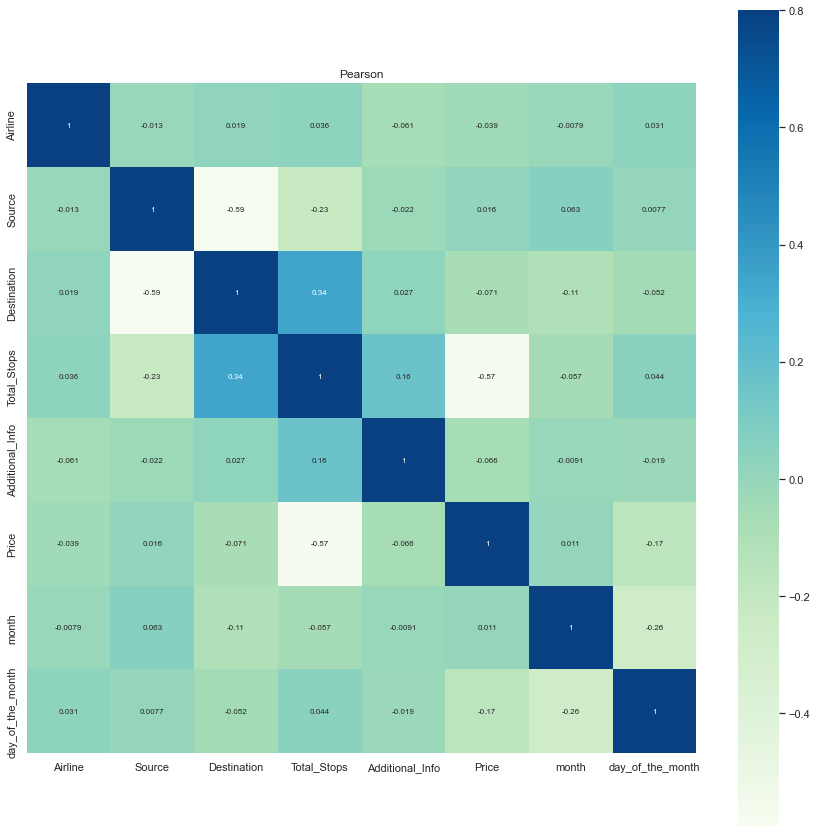

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

In [ ]:
dataframe =  dataframe.drop(["Route"], axis=1)

In [ ]:
dataframe["Dep_hour"] = dataframe["Dep_Time"].str.split(':', expand=True)[0]
dataframe =  dataframe.drop(["Dep_Time"], axis=1)
dataframe["Dep_hour"] = dataframe["Dep_hour"].astype("Int64")

dataframe["Arrival_hour"] = dataframe["Arrival_Time"].str.split(':', expand=True)[0]
dataframe =  dataframe.drop(["Arrival_Time"], axis=1)
dataframe["Arrival_hour"] = dataframe["Arrival_hour"].astype("Int64")

dataframe["Duration_hours"] = dataframe["Duration"].str.split('h', expand=True)[0]
dataframe =  dataframe.drop(["Duration"], axis=1)
dataframe["Duration_hours"] = dataframe["Duration_hours"].astype("Int64")


In [ ]:
dataframe

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day_of_the_month,Dep_hour,Arrival_hour,Duration_hours
0,3,0,5,4,8,50.025674,3,24,22,1,2
1,1,3,0,1,8,98.356868,1,5,5,13,7
2,4,2,1,1,8,178.202824,9,6,9,4,19
3,3,3,0,0,8,79.820282,12,5,18,23,5
4,3,0,5,0,8,170.757381,1,3,16,21,4
...,...,...,...,...,...,...,...,...,...,...,...
10676,0,3,0,4,8,52.721438,9,4,19,22,2
10677,1,3,0,4,8,53.209243,4,27,20,23,2
10678,4,0,2,4,8,92.798460,4,27,8,11,3
10679,10,0,5,4,8,162.362003,1,3,11,14,2


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10681 non-null  int64  
 1   Source            10681 non-null  int64  
 2   Destination       10681 non-null  int64  
 3   Total_Stops       10681 non-null  int64  
 4   Additional_Info   10681 non-null  int64  
 5   Price             10681 non-null  float64
 6   month             10681 non-null  int64  
 7   day_of_the_month  10681 non-null  int64  
 8   Dep_hour          10681 non-null  Int64  
 9   Arrival_hour      10681 non-null  Int64  
 10  Duration_hours    10681 non-null  Int64  
dtypes: Int64(3), float64(1), int64(7)
memory usage: 949.3 KB


<AxesSubplot:title={'center':'Pearson'}>

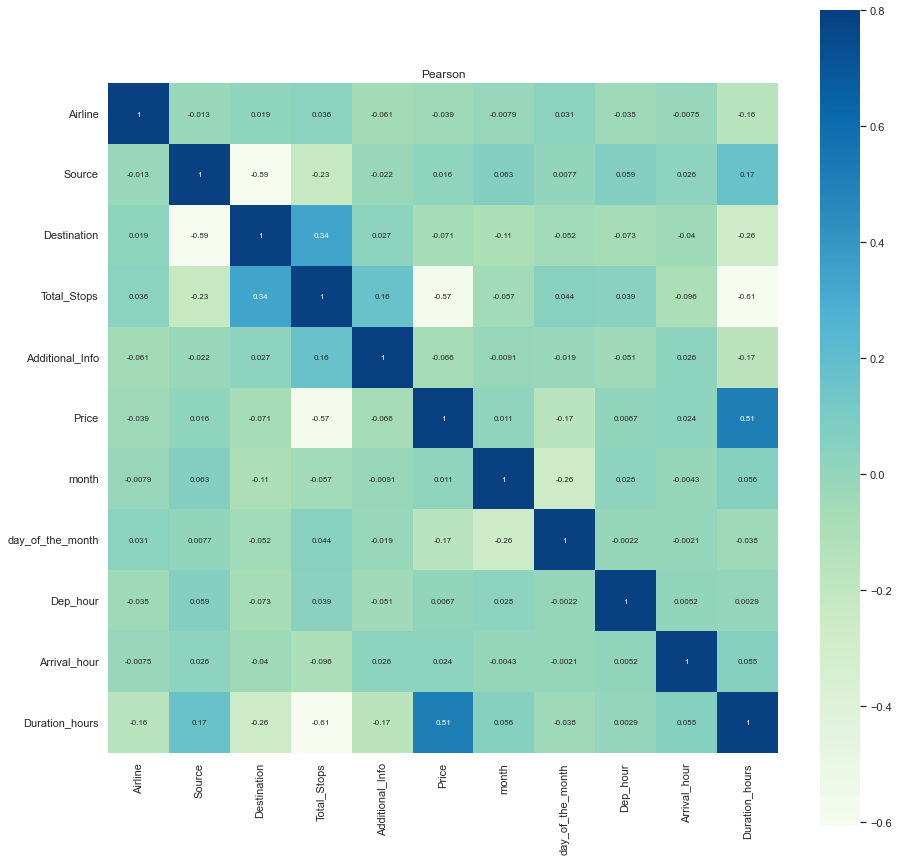

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

In [ ]:
dataframe = dataframe.drop(["Additional_Info", "Dep_hour", 	"Arrival_hour"], axis=1)

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>],
       [<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day_of_the_month'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>, <AxesSubplot:>]],
      dtype=object)

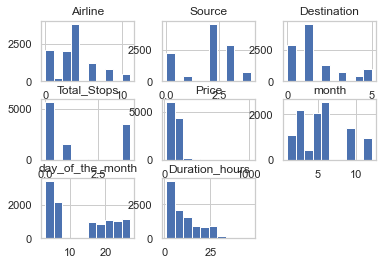

In [ ]:
dataframe.hist()

In [ ]:
dataframe

,Airline,Source,Destination,Total_Stops,Price,month,day_of_the_month,Duration_hours
0,3,0,5,4,50.025674,3,24,2
1,1,3,0,1,98.356868,1,5,7
2,4,2,1,1,178.202824,9,6,19
3,3,3,0,0,79.820282,12,5,5
4,3,0,5,0,170.757381,1,3,4
...,...,...,...,...,...,...,...,...
10676,0,3,0,4,52.721438,9,4,2
10677,1,3,0,4,53.209243,4,27,2
10678,4,0,2,4,92.798460,4,27,3
10679,10,0,5,4,162.362003,1,3,2


# Entrenamiento del Modelo

In [ ]:
y = dataframe['Price']
X = dataframe.drop(['Price'],axis=1)

In [ ]:
X

,Airline,Source,Destination,Total_Stops,month,day_of_the_month,Duration_hours
0,3,0,5,4,3,24,2
1,1,3,0,1,1,5,7
2,4,2,1,1,9,6,19
3,3,3,0,0,12,5,5
4,3,0,5,0,1,3,4
...,...,...,...,...,...,...,...
10676,0,3,0,4,9,4,2
10677,1,3,0,4,4,27,2
10678,4,0,2,4,4,27,3
10679,10,0,5,4,1,3,2


In [ ]:
y

0         50.025674
1         98.356868
2        178.202824
3         79.820282
4        170.757381
            ...    
10676     52.721438
10677     53.209243
10678     92.798460
10679    162.362003
10680    150.872914
Name: Price, Length: 10681, dtype: float64

In [ ]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X)
X = minmaxscaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20,test_size=0.30)

In [ ]:
X_train

array([[0.27272727, 0.25      , 0.8       , ..., 0.72727273, 0.125     ,
        0.02173913],
       [0.72727273, 0.75      , 0.        , ..., 0.27272727, 0.75      ,
        0.02173913],
       [0.36363636, 0.75      , 0.        , ..., 0.36363636, 0.75      ,
        0.10869565],
       ...,
       [0.09090909, 0.5       , 0.2       , ..., 0.72727273, 0.125     ,
        0.5       ],
       [0.09090909, 1.        , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.75      , 0.        , ..., 0.45454545, 0.08333333,
        0.10869565]])

In [ ]:
X_test

array([[0.27272727, 0.        , 0.4       , ..., 0.18181818, 0.08333333,
        0.04347826],
       [0.36363636, 0.        , 0.4       , ..., 0.36363636, 0.5       ,
        0.02173913],
       [0.27272727, 0.5       , 0.2       , ..., 0.36363636, 0.625     ,
        0.2173913 ],
       ...,
       [0.27272727, 0.5       , 0.2       , ..., 0.36363636, 0.75      ,
        0.23913043],
       [0.36363636, 0.        , 0.4       , ..., 1.        , 0.04166667,
        0.04347826],
       [0.27272727, 0.75      , 0.        , ..., 0.18181818, 0.875     ,
        0.02173913]])

In [ ]:
y_train

10444     49.525032
2844      56.983312
9811     189.743261
2752     184.698331
3616      48.870347
            ...    
3915     206.405648
9620     170.629012
7068     157.342747
7391     197.496791
4367     137.394095
Name: Price, Length: 7476, dtype: float64

In [ ]:
y_test

1276     61.912709
8416     92.798460
6051     87.522465
3701    182.759949
4071     53.581515
           ...    
347     147.715019
7878    147.830552
2294     93.940950
6606     66.726573
2896     89.666239
Name: Price, Length: 3205, dtype: float64

In [ ]:
ann = Sequential()
ann.add(Dense(7, activation='relu')) 
ann.add(Dense(4, activation='relu'))
#ann.add(Dense(2, activation='relu'))


ann.add(Dense(1))
#sgd = SGD(lr =0.02, momemtum = 0.7)
ann.compile(optimizer='adam', loss='mse')

In [ ]:
ann.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=25, epochs=250, verbose=1)

Epoch 1/250
 20/300 [=>............................] - ETA: 1s - loss: 16317.1982

2022-06-28 09:07:57.420682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


294/300 [============================>.] - ETA: 0s - loss: 16996.6172

2022-06-28 09:07:58.975687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 2s 6ms/step - loss: 16979.4121 - val_loss: 15599.6953
Epoch 2/250
300/300 [==============================] - 2s 6ms/step - loss: 13360.1572 - val_loss: 9185.0625
Epoch 3/250
300/300 [==============================] - 2s 5ms/step - loss: 6503.9395 - val_loss: 4197.0010
Epoch 4/250
300/300 [==============================] - 1s 5ms/step - loss: 4072.5759 - val_loss: 3396.6348
Epoch 5/250
300/300 [==============================] - 2s 6ms/step - loss: 3498.9207 - val_loss: 2966.7537
Epoch 6/250
300/300 [==============================] - 2s 5ms/step - loss: 3124.1868 - val_loss: 2664.9546
Epoch 7/250
300/300 [==============================] - 2s 6ms/step - loss: 2855.2693 - val_loss: 2452.6274
Epoch 8/250
300/300 [==============================] - 2s 5ms/step - loss: 2663.5239 - val_loss: 2301.9272
Epoch 9/250
300/300 [==============================] - 2s 6ms/step - loss: 2529.0500 - val_loss: 2204.2744
Epoch 10/250
300/300 [========================

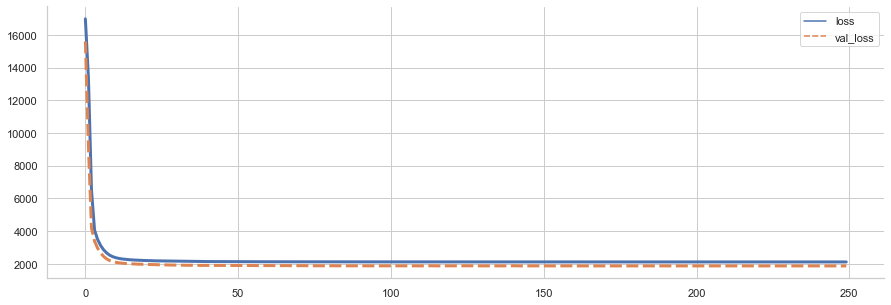

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
y_pred = ann.predict(X_test) 
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred)/116.642402)

31.720038238719003
0.27194260144539034


2022-06-28 09:14:24.424419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
vuelo = dataframe.drop('Price',axis=1).iloc[0]
print(vuelo,'Precio:',dataframe.iloc[0]['Price'])

Airline              3
Source               0
Destination          5
Total_Stops          4
month                3
day_of_the_month    24
Duration_hours       2
Name: 0, dtype: Int64 Precio: 50.02567394094993


In [ ]:
X

array([[0.27272727, 0.        , 1.        , ..., 0.18181818, 0.875     ,
        0.02173913],
       [0.09090909, 0.75      , 0.        , ..., 0.        , 0.08333333,
        0.13043478],
       [0.36363636, 0.5       , 0.2       , ..., 0.72727273, 0.125     ,
        0.39130435],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.27272727, 1.        ,
        0.04347826],
       [0.90909091, 0.        , 1.        , ..., 0.        , 0.        ,
        0.02173913],
       [0.09090909, 0.5       , 0.2       , ..., 0.72727273, 0.08333333,
        0.15217391]])

In [ ]:
vuelo = {
    'Airline':[3],
    'Source' :[0],
    'Destination':[5],
    'Total_Stops':[4],
    'month':[3],
    'day_of_the_month':[24],
    'Duration_hours':[2],
          }

data = pd.DataFrame(vuelo)
vuelo = data.iloc[0]
vuelo = minmaxscaler.transform(vuelo.values.reshape(-1,7))


print(ann.predict(vuelo))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[[71.66503]]
